**Market Segmentation Analysis for McDonald’s: Understanding Consumer Perceptions**

This project involves conducting a market segmentation analysis for McDonald’s using survey data collected from 1,453 adult Australian consumers. The study aims to identify consumer segments with distinctly different perceptions of McDonald’s, focusing on attributes such as taste, convenience, and health. By understanding these systematic differences, McDonald’s can refine its marketing strategies to strengthen positive perceptions or address negative ones. The dataset includes responses on 11 brand attributes (e.g., "YUMMY," "GREASY," "HEALTHY") and demographic details like age and gender. This analysis will help McDonald’s target specific segments effectively, either reinforcing its strengths or transforming negative brand perceptions.

First we explore the key characteristics of the data set by loading the data set and
inspecting basic features such as the variable names, the sample size, and the first
three rows of the data.

In [41]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/mcdonalds.csv")



In [42]:
# Display the column names
print(data.columns.tolist())

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']


In [43]:
#dimensions of the DataFrame
data.shape

(1453, 15)

In [44]:
data.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [46]:
print(pd.isnull(data).sum())

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [47]:
data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [48]:

# Select the first 11 columns
MD_x = data.iloc[:, 0:11]

# Convert "Yes" to 1 and other responses to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculate the column-wise means and round to 2 decimal places
column_means = MD_x.mean().round(2)

print(column_means)


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [49]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Get explained variance ratio and cumulative variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance': explained_variance,
    'Cumulative Variance': cumulative_variance
})

# Display the summary
print(summary_df)


   Principal Component  Explained Variance  Cumulative Variance
0                  PC1            0.299447             0.299447
1                  PC2            0.192797             0.492244
2                  PC3            0.133045             0.625290
3                  PC4            0.083096             0.708386
4                  PC5            0.059481             0.767866
5                  PC6            0.050300             0.818166
6                  PC7            0.043849             0.862015
7                  PC8            0.039548             0.901563
8                  PC9            0.036761             0.938323
9                 PC10            0.032353             0.970677
10                PC11            0.029323             1.000000


In [50]:
# Standard deviations of the principal components
std_devs = np.sqrt(pca.explained_variance_)
# Print standard deviations rounded to 1 decimal place
print("Standard deviations (1, .., p=11):")
print(np.round(std_devs, 1))

Standard deviations (1, .., p=11):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


In [51]:
from sklearn.decomposition import PCA

# Assuming MD_x is already defined and PCA has been performed
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Extract the rotation matrix (loadings)
rotation_matrix = pd.DataFrame(pca.components_.T,
                                columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                                index=MD_x.columns)

# Print the rotation matrix
print("Rotation (n x k):")
print(rotation_matrix)


Rotation (n x k):
                 PC1       PC2       PC3       PC4       PC5       PC6  \
yummy       0.476933 -0.363790  0.304444  0.055162  0.307535 -0.170738   
convenient  0.155332 -0.016414  0.062515 -0.142425 -0.277608  0.347830   
spicy       0.006356 -0.018809  0.037019  0.197619 -0.070620  0.355087   
fattening  -0.116232  0.034094  0.322359 -0.354139  0.073405  0.406515   
greasy     -0.304443  0.063839  0.802373  0.253960 -0.361399 -0.209347   
fast        0.108493  0.086972  0.064642 -0.097363 -0.107930  0.594632   
cheap       0.337186  0.610633  0.149310  0.118958  0.128973  0.103241   
tasty       0.471514 -0.307318  0.287265 -0.002547  0.210899  0.076914   
expensive  -0.329042 -0.601286 -0.024397  0.067816  0.003125  0.261342   
healthy     0.213711 -0.076593 -0.192051  0.763488 -0.287846  0.178226   
disgusting -0.374753  0.139656  0.088571  0.369539  0.729209  0.210878   

                 PC7       PC8       PC9      PC10      PC11  
yummy      -0.280519 -0.013041

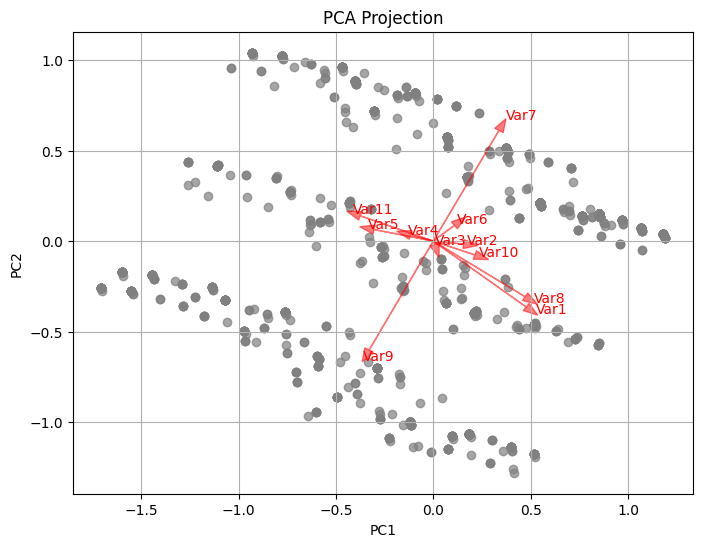

In [52]:
import matplotlib.pyplot as plt

# Plotting the PCA projections
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey', alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Plotting the axes (loading vectors)
components = pca.components_
for i, (x, y) in enumerate(components[:2].T):  # First two PCs
    plt.arrow(0, 0, x, y, color='red', alpha=0.5, head_width=0.05)
    plt.text(x * 1.1, y * 1.1, f"Var{i+1}", color='red')

plt.grid(True)
plt.show()


**Extracting Segments**: To illustrate a range of extraction techniques,
we subdivide this step into three sections. In the first section, we will use standard
k-means analysis. In the second section, we will use finite mixtures of binary
distributions. In the third section, we will use finite mixtures of regressions.

**Using k-Means**

In [53]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.preprocessing import LabelEncoder

# Function to perform k-means clustering and relabel clusters
def step_flexclust(X, min_clusters, max_clusters, n_init=10):
    best_kmeans_models = []
    for n_clusters in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=1234)
        kmeans.fit(X)
        best_kmeans_models.append((n_clusters, kmeans))

    return best_kmeans_models

# Perform clustering for 2 to 8 clusters
best_kmeans_models = step_flexclust(MD_x, 2, 8, n_init=10)

# Relabel clusters based on the most frequent label
def relabel_clusters(best_kmeans_models):
    relabeled_models = []

    for n_clusters, model in best_kmeans_models:
        # Find the majority class for each cluster
        labels = model.labels_
        unique_labels, counts = np.unique(labels, return_counts=True)

        # Relabel by finding the most frequent cluster label
        label_mapping = {label: idx for idx, label in enumerate(unique_labels)}
        relabeled_labels = np.array([label_mapping[label] for label in labels])

        # Store the relabeled model
        relabeled_models.append((n_clusters, relabeled_labels))

    return relabeled_models

# Relabel the clusters
relabelled_models = relabel_clusters(best_kmeans_models)



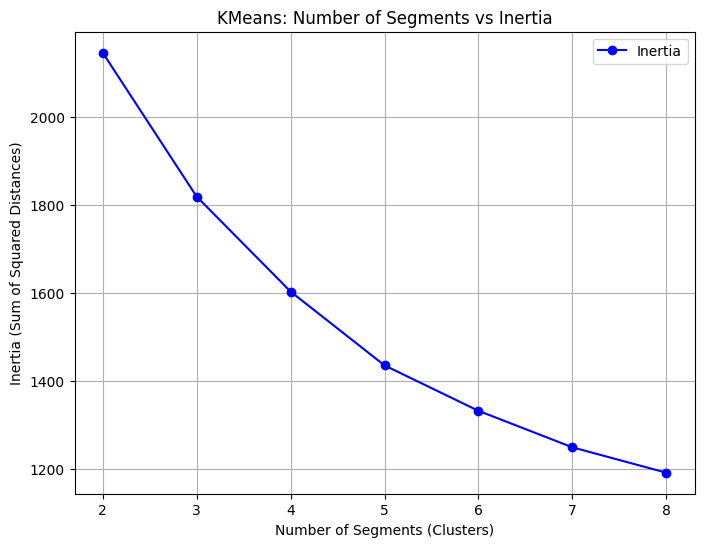

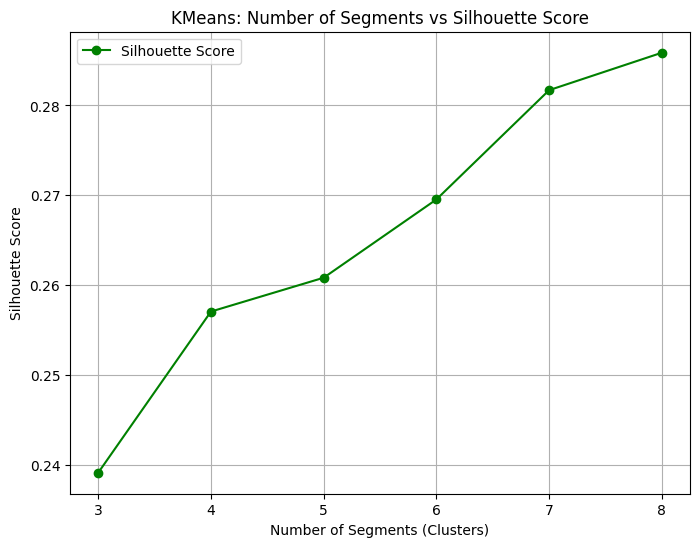

In [54]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Function to perform k-means clustering and evaluate metrics
def plot_kmeans_clusters(X, min_clusters, max_clusters, n_init=10):
    inertia = []  # Sum of squared distances to centroids (inertia)
    silhouette_scores = []  # Silhouette score for each number of clusters

    for n_clusters in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=1234)
        kmeans.fit(X)

        # Append inertia
        inertia.append(kmeans.inertia_)

        # Calculate silhouette score if there are more than 1 cluster
        if n_clusters > 1:
            score = silhouette_score(X, kmeans.labels_)
            silhouette_scores.append(score)
        else:
            silhouette_scores.append(None)

    # Plot Inertia vs Number of Clusters
    plt.figure(figsize=(8, 6))
    plt.plot(range(min_clusters, max_clusters + 1), inertia, marker='o', color='blue', label='Inertia')
    plt.xlabel('Number of Segments (Clusters)')
    plt.ylabel('Inertia (Sum of Squared Distances)')
    plt.title('KMeans: Number of Segments vs Inertia')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Plot Silhouette Score vs Number of Clusters
    plt.figure(figsize=(8, 6))
    plt.plot(range(min_clusters + 1, max_clusters + 1), silhouette_scores[1:], marker='o', color='green', label='Silhouette Score')
    plt.xlabel('Number of Segments (Clusters)')
    plt.ylabel('Silhouette Score')
    plt.title('KMeans: Number of Segments vs Silhouette Score')
    plt.grid(True)
    plt.legend()
    plt.show()




# Example usage
plot_kmeans_clusters(MD_x, 2, 8, n_init=10)


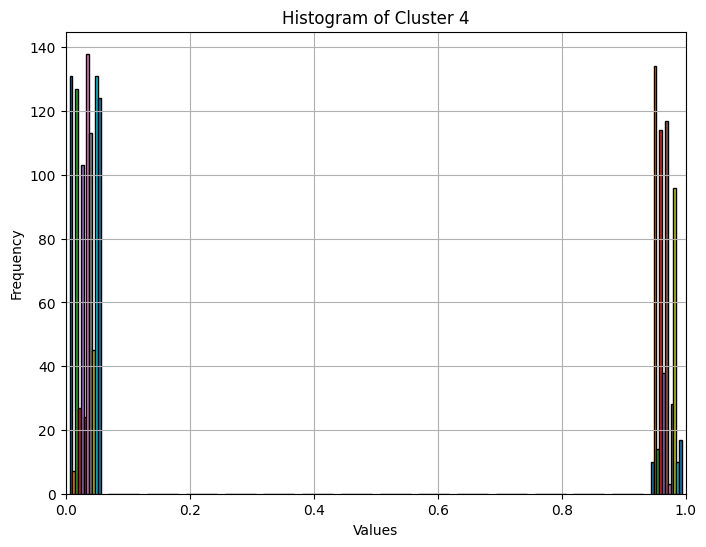

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming MD_x is your dataset and you have already performed KMeans clustering (MD.km28 in R)
# First, apply KMeans clustering with the desired number of clusters (for example, 8 clusters)
kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(MD_x)

# Extract the labels for the clusters
labels = kmeans.labels_

# Extract the points belonging to the 4th cluster (0-indexed, so cluster 4 is index 3)
cluster_4_labels = MD_x[labels == 3]

# Plot the histogram for the 4th cluster
plt.figure(figsize=(8, 6))
plt.hist(cluster_4_labels, bins=16, range=(0, 1), edgecolor='black')
plt.title('Histogram of Cluster 4')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xlim(0, 1)  # Similar to xlim = 0:1 in R
plt.grid(True)
plt.show()


**Using Mixtures of Distributions**

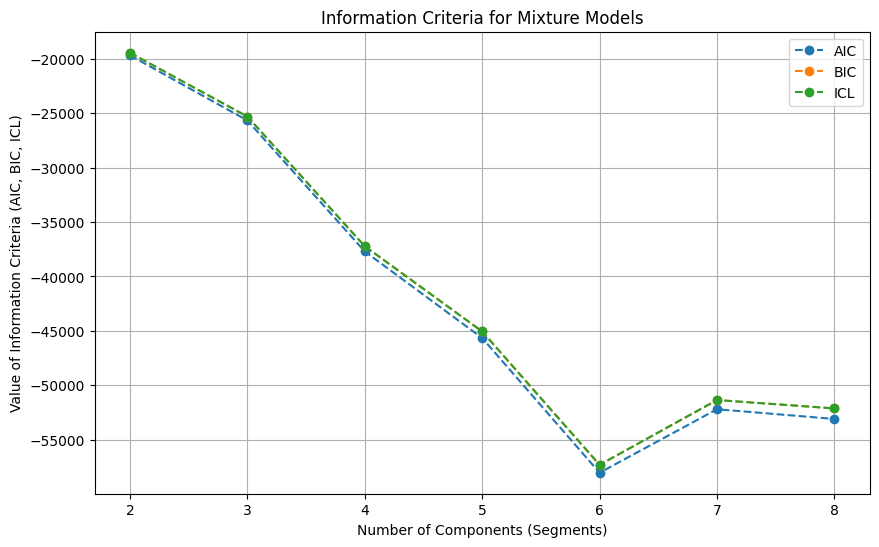

Cross-tabulation between K-Means and GMM:
mixture    0   1    2    3
kmeans                    
0        239  17    0  324
1          0  24  204    0
2          0   8   94  220
3        279  44    0    0

Log-Likelihoods:
Random Initialization: 18941.518
K-Means Initialization: 13167.060


In [56]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Fit Gaussian Mixture Model (2 to 8 components)
aic_values, bic_values, icl_values = [], [], []
models = {}

for k in range(2, 9):
    gmm = GaussianMixture(n_components=k, covariance_type="diag", random_state=1234, n_init=10)
    gmm.fit(MD_x)
    models[k] = gmm
    aic_values.append(gmm.aic(MD_x))
    bic_values.append(gmm.bic(MD_x))
    icl_values.append(gmm.bic(MD_x) + np.sum(-np.log(gmm.predict_proba(MD_x).max(axis=1))))

# Step 2: Plot AIC, BIC, and ICL
plt.figure(figsize=(10, 6))
plt.plot(range(2, 9), aic_values, label="AIC", marker='o', linestyle='--')
plt.plot(range(2, 9), bic_values, label="BIC", marker='o', linestyle='--')
plt.plot(range(2, 9), icl_values, label="ICL", marker='o', linestyle='--')
plt.xlabel("Number of Components (Segments)")
plt.ylabel("Value of Information Criteria (AIC, BIC, ICL)")
plt.title("Information Criteria for Mixture Models")
plt.legend()
plt.grid()
plt.show()

# Step 3: Choose k=4 (or any number based on results)
optimal_k = 4
gmm_optimal = models[optimal_k]
gmm_labels = gmm_optimal.predict(MD_x)

# Step 4: Compare with K-Means solution
kmeans = KMeans(n_clusters=optimal_k, random_state=1234)
kmeans_labels = kmeans.fit_predict(MD_x)

# Cross-tabulation of K-Means and GMM
cross_tab = pd.crosstab(kmeans_labels, gmm_labels, rownames=["kmeans"], colnames=["mixture"])
print("Cross-tabulation between K-Means and GMM:")
print(cross_tab)

# Step 5: Initialize GMM with K-Means clusters
gmm_initialized = GaussianMixture(n_components=optimal_k, covariance_type="diag", random_state=1234)
gmm_initialized.fit(MD_x, kmeans_labels)
log_likelihood_initialized = gmm_initialized.score(MD_x) * len(MD_x)
log_likelihood_random = gmm_optimal.score(MD_x) * len(MD_x)

# Log-Likelihoods
print("\nLog-Likelihoods:")
print(f"Random Initialization: {log_likelihood_random:.3f}")
print(f"K-Means Initialization: {log_likelihood_initialized:.3f}")


**Using Mixtures of Regression Models**

In [57]:
like_counts_reversed = data['Like'].value_counts()[::-1]

print(like_counts_reversed)

Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


In [58]:
data['Like_n'] = 6 - pd.to_numeric(data['Like'], errors='coerce')

# Get the value counts (equivalent to table())
like_n_counts = data['Like_n'].value_counts()

print(like_n_counts)

Like_n
3.0     229
4.0     187
6.0     169
2.0     160
5.0     152
9.0      73
10.0     71
8.0      59
7.0      58
Name: count, dtype: int64


In [59]:
import pandas as pd
import statsmodels.formula.api as smf

# Create the formula for the model
cols = data.columns[:11]  # Get the first 11 column names
f = " + ".join(cols)  # Combine column names with a "+" separator
f = f"Like_n ~ {f}"  # Create the full formula

# Convert the formula string to a statsmodels formula
formula = smf.ols(formula=f, data=data)

print(formula)
